# Sufficient statistics for online linear regression

First, I need to recreate the data generating function from [here](https://github.com/probml/pmtk3/blob/master/matlabTools/stats/polyDataMake.m) in Python.

[[  0.           0.02086459]
 [  1.           1.03068725]
 [  2.          -0.64248419]
 [  3.          -3.17686957]
 [  4.          -5.56714304]
 [  5.          -5.83791598]
 [  6.          -1.87273435]
 [  7.          -7.09074953]
 [  8.          -5.11694219]
 [  9.          -4.14480128]
 [ 10.          -1.35614247]
 [ 11.          -3.75195173]
 [ 12.          -3.74074088]
 [ 13.           1.96509982]
 [ 14.           1.94495098]
 [ 15.           2.19102924]
 [ 16.           6.12731579]
 [ 17.           7.25034905]
 [ 18.           7.86840756]
 [ 19.          12.54348186]
 [ 20.          13.60586792]]


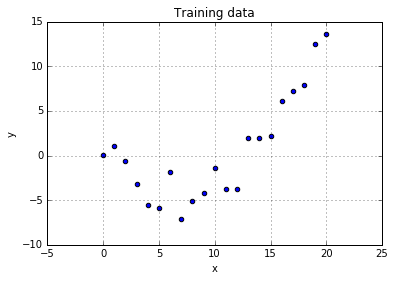

In [1]:
%matplotlib inline

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd

def make_data(N):
    X = np.linspace(0, 20, N)
    Y = stats.norm.rvs(size=N, loc=-1.5*X + X*X/9, scale=2)
    return X, Y

def plot_xy(x, y, ax=None):
    if ax == None:
        ax = plt.gca()    
    ax.scatter(x, y)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title("Training data")
    ax.grid(True)
    
X, Y = make_data(21)
print(np.column_stack((X,Y)))
plot_xy(X, Y)
plt.show()

Data is not really linear, but let's just do what the exercise tells us to do. Thus, our model is 
\begin{equation}
y_i \sim \mathcal{N}(w_0 + w_1x_i, \sigma^2),
\end{equation}
or written in vector notation,
\begin{equation}
\mathbf{y} \sim \mathcal{N}\left(w_0\mathbf{1} + w_1\mathbf{x}, \sigma^2I\right).
\end{equation}

Thus, we have that
\begin{align}
p(\mathbf{y} \mid w_0,w_1,\sigma^2,\mathbf{x}) &= \prod_{i=1}^N\frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{1}{2\sigma^2}\left(y_i - w_0 - w_1x_i\right)^2\right) \\
l(w_0,w_1,\sigma^2) = \log p(\mathbf{y} \mid w_0,w_1,\sigma^2,\mathbf{x}) &= -\frac{N}{2}\log(2\pi) - \frac{N}{2}\log(\sigma^2) - \frac{1}{2\sigma^2}\sum_{i=1}^N\left(y_i - w_0 - w_1x_i\right)^2.
\end{align}

Let us try to maximize the log-likelihood. We first solve for $w_0$.
\begin{align}
\frac{\partial{l}}{\partial w_0} = \frac{1}{\sigma^2}\sum_{i=1}^N \left(y_i - w_0 - w_1x_i\right)
= \frac{1}{\sigma^2}\left(-Nw_0 + \sum_{i=1}^N y_i - w_1 \sum_{i=1}^Nx_i\right).
\end{align}
Setting $\frac{\partial{l}}{\partial w_0} = 0$ and solving for $w_0$, we find that
\begin{equation}
\hat{w}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{w}_1\frac{\sum_{i=1}^N x_i}{N} = \bar{y} - \hat{w}_1\bar{x}
\end{equation}

Next, we solve for $w_1$. Taking the derivative, we have 
\begin{align}
\frac{\partial{l}}{\partial w_1} = \frac{1}{\sigma^2}\sum_{i=1}^N x_i\left(y_i - w_0 - w_1x_i\right)
= \frac{1}{\sigma^2}\sum_{i=1}^N\left(x_iy_i - w_0x_i - w_1x_i^2\right).
\end{align}
Setting $frac{\partial{l}}{\partial w_1} = 0$ and substituting $\hat{w}_0$ for $w_0$, we have that
\begin{align}
0 &= \frac{1}{\sigma^2}\sum_{i=1}^N\left(x_iy_i - (\bar{y} - \hat{w}_1\bar{x})x_i - \hat{w}_1x_i^2\right) \\
&= \sum_{i=1}^N\left(x_iy_i - x_i\bar{y}\right) -\hat{w}_1\sum_{i=1}^N\left(x_i^2 - x_i\bar{x}\right).
\end{align}
Since $\sum_{i=1}^N x_i = N\bar{x}$, we have that
\begin{align}
0 &= \sum_{i=1}^N\left(x_iy_i - \bar{x}\bar{y}\right) -\hat{w}_1\sum_{i=1}^N\left(x_i^2 - \bar{x}^2\right) \\
\hat{w}_1 &= \frac{\sum_{i=1}^N\left(x_iy_i - \bar{x}\bar{y}\right)}{\sum_{i=1}^N\left(x_i^2 - \bar{x}^2\right)} 
= \frac{\sum_{i=1}^N\left(x_iy_i - x_i\bar{y} -\bar{x}y_i + \bar{x}\bar{y}\right)}{\sum_{i=1}^N\left(x_i^2 - 2x_i\bar{x} + \bar{x}^2\right)} \\
&= \frac{\sum_{i=1}(x_i - \bar{x})(y_i-\bar{y})}{\sum_{i=1}(x_i - \bar{x})^2} 
= \frac{\frac{1}{N}\sum_{i=1}(x_i - \bar{x})(y_i-\bar{y})}{\frac{1}{N}\sum_{i=1}(x_i - \bar{x})^2},
\end{align}
which is just the MLE for the covariance of $X$ and $Y$ over the variance of $X$. This can also be written as
\begin{equation}
\hat{w}_1 = \frac{\frac{1}{N}\sum_{i=1}(x_i - \bar{x})(y_i-\bar{y})}{\frac{1}{N}\sum_{i=1}(x_i - \bar{x})^2}
= \frac{\sum_{i=1}^N x_iy_i - \frac{1}{N}\left(\sum_{i=1}^Nx_i\right)\left(\sum_{i=1}^Ny_i\right)}{\sum_{i=1}^N x_i^2 - \frac{1}{N}\left(\sum_{i=1}^Nx_i\right)^2}.
\end{equation}

Finally, solving for $\sigma^2$, we have that
\begin{align}
\frac{\partial{l}}{\partial w_1} = -\frac{N}{2\sigma^2} + \frac{1}{2(\sigma^2)^2}\sum_{i=1}^N\left(y_i - \left(w_0 +w_1x_i\right)\right)^2.
\end{align}
Setting this equal to $0$, substituting for $w_0$ and $w_1$, we have that
\begin{align}
\hat{\sigma}^2 &= \frac{1}{N}\sum_{i=1}^N\left(y_i - \left(\hat{w}_0 +\hat{w}_1x_i\right)\right)^2 
= \frac{1}{N}\sum_{i=1}^N\left(y_i^2 - 2y_i\left(\hat{w}_0 +\hat{w}_1x_i\right) + \left(\hat{w}_0 +\hat{w}_1x_i\right)^2\right) \\
&= \hat{w}_0^2 + \frac{1}{N}\left(\sum_{i=1}^Ny_i^2 - 2\hat{w}_0\sum_{i=1}^Ny_i - 2\hat{w}_1\sum_{i=1}^N x_iy_i + 2\hat{w}_0\hat{w}_1\sum_{i=1}^N x_i + \hat{w}_1^2\sum_{i=1}^N x_i^2\right).
\end{align}

Thus, our sufficient statistics are
\begin{equation}
\left(N, \sum_{i=1}^N x_i, \sum_{i=1}^N y_i,\sum_{i=1}^N x_i^2, \sum_{i=1}^N y_i^2, \sum_{i=1}^N x_iy_i\right).
\end{equation}


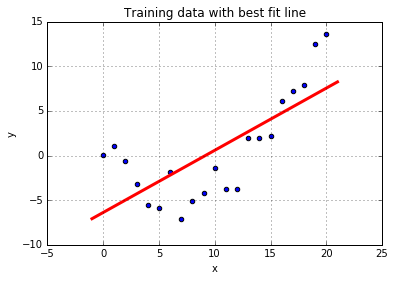

{'variance': 15.702870444871245, 'slope': 0.69667255819381513, 'intercept': -6.3834123045835565}


In [2]:
class SimpleOnlineLinearRegressor:
    ## keep track of sufficient statistics
    def __init__(self):
        self.N = 0
        self.x_sum = 0
        self.y_sum = 0
        self.x_squared_sum = 0
        self.y_squared_sum = 0
        self.xy_sum = 0
        self.w0 = 0
        self.w1 = 0
        self.sigma2 = 0
    def fit(self, X, y):
        cov = np.cov(X,y,bias=True)
        self.N = len(y)
        self.w1 = cov[0,1]/cov[0,0]
        self.w0 = np.mean(y) - self.w1*np.mean(X)
        self.sigma2 = np.dot(y - self.w0 - self.w1*X, y - self.w0 - self.w1*X)/self.N
    def partial_fit(self, x, y):
        self.N += 1
        self.x_sum += x
        self.y_sum += y
        self.x_squared_sum += x*x
        self.y_squared_sum += y*y
        self.xy_sum += x*y  
        if self.N > 1:
            self.w1 = (self.xy_sum - self.x_sum*self.y_sum/self.N)/(self.x_squared_sum - self.x_sum*self.x_sum/self.N)
            self.w0 = (self.y_sum - self.w1*self.x_sum)/self.N
            self.sigma2 = self.w0*self.w0 + (self.y_squared_sum - 2*self.w0*self.y_sum - 2*self.w1*self.xy_sum + 2*self.w0*self.w1*self.x_sum + self.w1*self.w1*self.x_squared_sum)/self.N
    def get_params(self):
        return {'intercept': self.w0, 'slope': self.w1, 'variance': self.sigma2}
linReg = SimpleOnlineLinearRegressor()
linReg.fit(X, Y)
def plot_abline(xmin, xmax, slope, intercept, ax=None):
    if ax == None:
        ax = plt.gca()
    ax.plot([xmin, xmax], [xmin*slope + intercept, xmax*slope + intercept],
            linewidth=3, color='red')
plot_xy(X, Y)
plot_abline(np.min(X) - 1, np.max(X) + 1, linReg.get_params()['slope'], linReg.get_params()['intercept'], ax=plt.gca())
plt.title("Training data with best fit line")
plt.show()
print(linReg.get_params())

Now, let's verify that the online version comes to the same numbers.

      w0_est    w1_est        sigma2
2   0.020865  1.009823  4.076600e-17
3   0.468030 -0.331674  3.999143e-01
4   0.998006 -1.126637  8.265742e-01
5   1.409725 -1.538357  1.000286e+00
6   1.325126 -1.474908  8.492274e-01
7   0.315914 -0.869381  3.172330e+00
8   0.536081 -0.979464  2.903031e+00
9   0.196552 -0.833951  2.909844e+00
10 -0.263697 -0.661358  3.274205e+00
11 -1.016579 -0.410397  4.865989e+00
12 -1.244656 -0.341974  4.646458e+00
13 -1.438982 -0.288976  4.433223e+00
14 -2.257357 -0.084383  6.837368e+00
15 -2.840587  0.050209  7.846839e+00
16 -3.281019  0.144587  8.239715e+00
17 -3.976602  0.283704  1.007743e+01
18 -4.575805  0.396054  1.132963e+01
19 -5.051379  0.479979  1.193071e+01
20 -5.777829  0.601054  1.425868e+01
21 -6.383412  0.696673  1.570287e+01
{'variance': 15.702870444871273, 'slope': 0.69667255819381502, 'intercept': -6.3834123045835565}


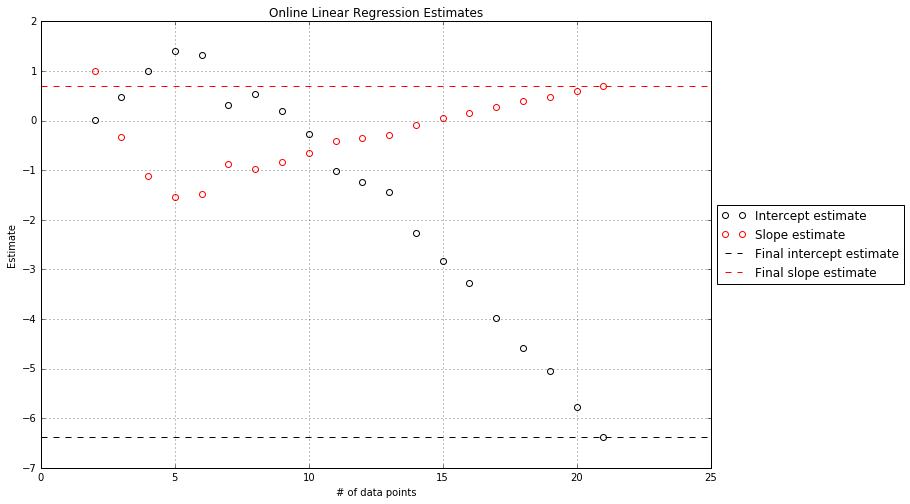

In [3]:
onlineLinReg = SimpleOnlineLinearRegressor()
w_estimates = pd.DataFrame(index=np.arange(2,22), columns=['w0_est', 'w1_est', 'sigma2'], dtype=np.float64)
for i in range(len(Y)):
    onlineLinReg.partial_fit(X[i], Y[i])
    if i >= 1:
        w_estimates.loc[i + 1] = {'w0_est': onlineLinReg.get_params()['intercept'], 
                                  'w1_est': onlineLinReg.get_params()['slope'],
                                  'sigma2': onlineLinReg.get_params()['variance']}
print(w_estimates)
print(onlineLinReg.get_params())
plt.figure(figsize=(12,8))
plt.plot(w_estimates.index, w_estimates['w0_est'], 'o', 
         markeredgecolor='black', markerfacecolor='none', markeredgewidth=1,
         label='Intercept estimate')
plt.plot(w_estimates.index, w_estimates['w1_est'], 'o', 
         markeredgecolor='red', markerfacecolor='none', markeredgewidth=1,
         label='Slope estimate')
plt.grid()
plt.ylabel('Estimate')
plt.xlabel('# of data points')
plt.title('Online Linear Regression Estimates')
plt.hlines(onlineLinReg.get_params()['intercept'], xmin=np.min(X), xmax=np.max(X) + 5, linestyle='--',
           label='Final intercept estimate')
plt.hlines(onlineLinReg.get_params()['slope'], xmin=np.min(X), xmax=np.max(X) + 5, linestyle='--', color='red',
           label='Final slope estimate')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show()
